# Projet Histogram of oriented gradient

ref : https://www.analyticsvidhya.com/blog/2019/09/feature-engineering-images-introduction-hog-feature-descriptor/

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import itertools
from scipy.ndimage.interpolation import shift

## 1 :  Preprocess the Data

We need to preprocess the image and bring down the width to height ratio to 1:2. The image size should preferably be 64 x 128. This is because we will be dividing the image into 8x8 and 16x16 patches to extract the features. Having the specified size (64 x 128) will make all our calculations pretty simple. In fact, this is the exact value used in the original paper.

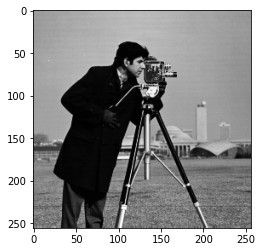

taille de l'image :  (256, 256)


In [2]:
# faut mettre votre path !!

path_base = './'
image = cv2.imread(path_base+'cameraman.tif',0) 

plt.imshow(image,'gray')
plt.show()
print("taille de l'image : ", image.shape)

In [3]:
dsize= (64,128)
image_resized = cv2.resize(image, dsize, interpolation = cv2.INTER_AREA)

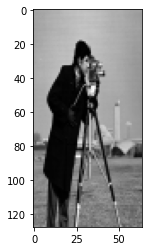

taille de l'image :  (128, 64)


In [4]:
plt.imshow(image_resized,'gray')
plt.show()
print("taille de l'image : ", image_resized.shape)

## 2 : Calculating Gradients (direction x and y)

The next step is to calculate the gradient for every pixel in the image. Gradients are the small change in the x and y directions.

To determine the gradient (or change) in the x-direction, we need to subtract the value on the left from the pixel value on the right. Similarly, to calculate the gradient in the y-direction, we will subtract the pixel value below from the pixel value above the selected pixel.

This process will give us two new matrices – one storing gradients in the x-direction and the other storing gradients in the y direction. 

In [5]:
masque = np.array([[-1,0,1]])

In [6]:
def matrice_x(img, h):
    h_rows,h_cols=h.shape
    h = h.reshape((-1,))
    rows,cols = img.shape
    large_img = np.stack([shift(img.astype(np.float32),(i-h_rows//2,j-h_cols//2),cval=np.NaN) for i,j in itertools.product(range(h_rows),range(h_cols))],axis=-1)
    return np.dot(large_img,h).astype(np.uint8)

In [7]:
def matrice_y(img, h):
    return matrice_x(img, h.T)

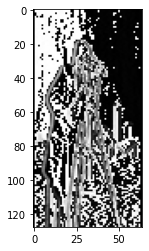

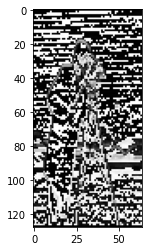

In [8]:
plt.imshow(matrice_x(image_resized, masque), 'gray')
plt.show()
plt.imshow(matrice_y(image_resized, masque), 'gray')
plt.show()

In [9]:
np.unique(matrice_x(image_resized, masque))

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

## 3 : Calculate the Magnitude and Orientation

For this step, we will be using the Pythagoras theorem (ça rappel pleins de souvenirs <3). Voir sur le site internet ça explique bien. Voici les formules : 


Total Gradient Magnitude =  √[(Gx)2+(Gy)2]

Φ = atan(Gy / Gx)

In [18]:
def magnitude_and_orientation(img):
    masque = np.array([[-1,0,1]])
    Mx = matrice_x(img, masque)
    My = matrice_y(img, masque.T)
    magnitude = np.sqrt(np.power(Mx,2) + np.power(My,2))
    orientation = np.rad2deg(np.arctan(My.astype(np.float64)/(Mx+0.00000000001)))
    print((My.astype(np.float64)))
    print(((Mx+0.00000000001)))
    print((My.astype(np.float64)/(Mx+0.00000000001))[0][14])
    return magnitude, orientation

So now, for every pixel value, we have the total gradient (magnitude) and the orientation (direction). We need to generate the histogram using these gradients and orientations.

## 4 : Calculate Histogram of Gradients in 8×8 cells (9×1)

In [19]:
hist_bins = np.array([0,20,40,60,80,100,120,140,160])
hist = np.zeros(9)
m, o = magnitude_and_orientation(image_resized)
rows,cols = image_resized.shape
for i in range(rows):
    for j in range(cols) :
        hist[int(np.floor(o[i][j]/20))] =+ m[i][j]

[[  0. 255. 255. ...   0.   2.   0.]
 [  0. 255. 255. ...   0.   2.   0.]
 [  0.   1. 254. ...   2.   3.   0.]
 ...
 [  0. 241.   8. ...  20.   4.   0.]
 [  0. 255. 245. ...  13. 247.   0.]
 [  0. 247.   8. ...  18. 240.   0.]]
[[1.00e-11 2.55e+02 2.55e+02 ... 1.00e-11 2.00e+00 1.00e-11]
 [1.00e-11 2.55e+02 2.55e+02 ... 1.00e-11 2.00e+00 1.00e-11]
 [1.00e-11 1.00e+00 2.54e+02 ... 2.00e+00 3.00e+00 1.00e-11]
 ...
 [1.00e-11 2.41e+02 8.00e+00 ... 2.00e+01 4.00e+00 1.00e-11]
 [1.00e-11 2.55e+02 2.45e+02 ... 1.30e+01 2.47e+02 1.00e-11]
 [1.00e-11 2.47e+02 8.00e+00 ... 1.80e+01 2.40e+02 1.00e-11]]
0.9999999999999608


In [69]:
hist

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])